In [1]:
#Import Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
#load the directory
test_dir = '../input/dataset/MultiDataset/Test'

In [3]:
#Variables declaration
IMG_SIZE = (224,224)
RANDOM_SEED = 1803

In [4]:
#Test Data Generator
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    color_mode  = 'rgb',
    class_mode  = 'categorical',
    shuffle     = 'False',
    seed        = RANDOM_SEED
)

Found 3147 images belonging to 4 classes.


In [5]:
#Evaluate on Test data
def accuracy_loss_evaluation(model):
    test_score = model.evaluate(test_data)
    print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

#True and predicted value calculation
def true_prediction_calculation(model):
    
    predictions = []
    true        = []
    ctr         = 0
    for batch, label in test_data:
        prediction = model.predict(batch).argmax(axis = -1)
        predictions.extend(prediction)
        true.extend(label.argmax(axis = -1))
        ctr += len(prediction)
        if ctr >= len(test_data.labels):
            break
        
    return true, predictions

In [6]:
class_labels = list(test_data.class_indices.keys())
#Plot Confusion Matrix
def plot_confusion_matirix(true, predictions):
    matrix    = confusion_matrix(true, predictions)
    fig, axes = plt.subplots()

    axes.imshow(matrix, cmap = plt.get_cmap('Oranges'))
    for (i, j), e in np.ndenumerate(matrix):
        axes.text(j, i, s = str(e), ha='center', va = 'center')
    axes.set_xticks(np.arange(0, len(class_labels), 1))
    axes.set_xticklabels(class_labels)
    axes.set_yticks(np.arange(0, len(class_labels), 1))
    axes.set_yticklabels(class_labels)
    #axes.set_title('Confusion Matrix')  
    plt.show()


#Plot ROC curve
def plot_roc_curve(true, predictions):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 3
    n_classes = len(class_labels)
    y_test = to_categorical(true)
    y_pred = to_categorical(predictions)

    plt.figure(figsize = (10,5))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color = color, lw = lw,
              label='ROC curve of class {0} (area = {1:0.4f})'
              ''.format(class_labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw = lw)
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")
    plt.show()
    
    
#Accuracy, Precision, Recall, F1-score, Classification Report, ROC curve
def performance_evaluation(true, predictions):

    plot_confusion_matirix(true, predictions)

    print('\n\nAccuracy: {:.2f}%\n'.format(accuracy_score(true, predictions)*100))

    print('Micro Precision: {:.2f}%'.format(precision_score(true, predictions,average = 'micro')*100))
    print('Micro Recall: {:.2f}%'.format(recall_score(true, predictions,average = 'micro')*100))
    print('Micro F1-score: {:.2f}%\n'.format(f1_score(true, predictions,average = 'micro')*100))

    print('\nMacro Precision: {:.2f}%'.format(precision_score(true, predictions,average = 'macro')*100))
    print('Macro Recall: {:.2f}%'.format(recall_score(true, predictions,average = 'macro')*100))
    print('Macro F1-score: {:.2f}%\n'.format(f1_score(true, predictions,average = 'macro')*100))

    print('\nWeighted Precision: {:.2f}%'.format(precision_score(true, predictions,average = 'weighted')*100))
    print('Weighted Recall: {:.2f}%'.format(recall_score(true, predictions,average = 'weighted')*100))
    print('Weighted F1-score: {:.2f}%'.format(f1_score(true, predictions,average = 'weighted')*100))

    print('\nClassification Report:\n')
    print(classification_report(true,predictions, target_names=['AD', 'CN', 'EMCI', 'LMCI']))

    print('\n')
    plot_roc_curve(true, predictions)

# VGG-16 model

In [7]:
#Load VGG-16 Model
vgg16_model = keras.models.load_model('../input/multiclass-pretrained-models/multiclass_VGG16.h5')

2022-03-18 04:30:23.512362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 04:30:23.626921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 04:30:23.627708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 04:30:23.628836: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
#accuracy-loss of each set for VGG-16 model
accuracy_loss_evaluation(vgg16_model)

2022-03-18 04:30:26.817757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-18 04:30:27.928371: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


99/99 [==============================] - 27s 178ms/step - loss: 0.1410 - accuracy: 0.9657
Test loss 0.1410, accuracy 96.57%


In [9]:
#Calculate true and predicted value of test set
vgg16_y_true, vgg16_y_pred = true_prediction_calculation(vgg16_model)

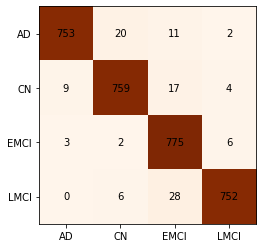



Accuracy: 96.57%

Micro Precision: 96.57%
Micro Recall: 96.57%
Micro F1-score: 96.57%


Macro Precision: 96.64%
Macro Recall: 96.57%
Macro F1-score: 96.58%


Weighted Precision: 96.64%
Weighted Recall: 96.57%
Weighted F1-score: 96.58%

Classification Report:

              precision    recall  f1-score   support

          AD       0.98      0.96      0.97       786
          CN       0.96      0.96      0.96       789
        EMCI       0.93      0.99      0.96       786
        LMCI       0.98      0.96      0.97       786

    accuracy                           0.97      3147
   macro avg       0.97      0.97      0.97      3147
weighted avg       0.97      0.97      0.97      3147





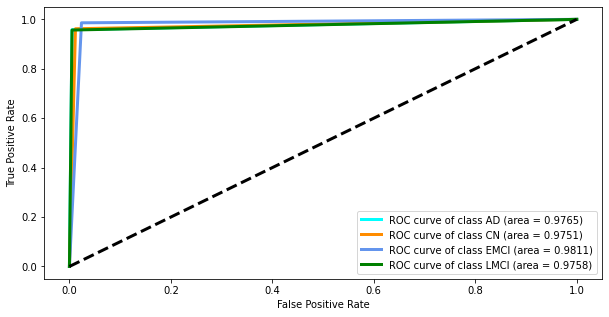

In [10]:
#Performance Evaluation of VGG-16 model
performance_evaluation(vgg16_y_true, vgg16_y_pred)

# VGG-19 Model

In [11]:
#Load VGG-19 model
vgg19_model = keras.models.load_model('../input/multiclass-pretrained-models/multiclass_VGG19.h5')

In [12]:
#accuracy-loss of each set for VGG-19 model
accuracy_loss_evaluation(vgg19_model)

99/99 [==============================] - 10s 95ms/step - loss: 0.1402 - accuracy: 0.9616
Test loss 0.1402, accuracy 96.16%


In [13]:
#Calculate true and predicted value of test set
vgg19_y_true, vgg19_y_pred = true_prediction_calculation(vgg19_model)

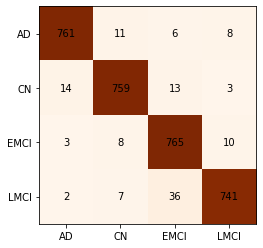



Accuracy: 96.16%

Micro Precision: 96.16%
Micro Recall: 96.16%
Micro F1-score: 96.16%


Macro Precision: 96.20%
Macro Recall: 96.16%
Macro F1-score: 96.16%


Weighted Precision: 96.20%
Weighted Recall: 96.16%
Weighted F1-score: 96.16%

Classification Report:

              precision    recall  f1-score   support

          AD       0.98      0.97      0.97       786
          CN       0.97      0.96      0.96       789
        EMCI       0.93      0.97      0.95       786
        LMCI       0.97      0.94      0.96       786

    accuracy                           0.96      3147
   macro avg       0.96      0.96      0.96      3147
weighted avg       0.96      0.96      0.96      3147





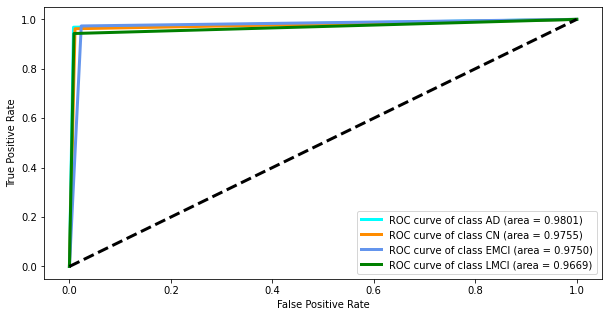

In [14]:
#Performance Evaluation of VGG-19 model
performance_evaluation(vgg19_y_true, vgg19_y_pred)

# ResNet-152

In [15]:
#Load ResNet-152 model
resnet152_model = keras.models.load_model('../input/multiclass-pretrained-models/multiclass_ResNet152.h5')

In [16]:
#accuracy-loss of each set for ResNet-152 model
accuracy_loss_evaluation(resnet152_model)

99/99 [==============================] - 17s 147ms/step - loss: 0.1508 - accuracy: 0.9774
Test loss 0.1508, accuracy 97.74%


In [17]:
#Calculate true and predicted value of test set
resnet152_y_true, resnet152_y_pred = true_prediction_calculation(resnet152_model)

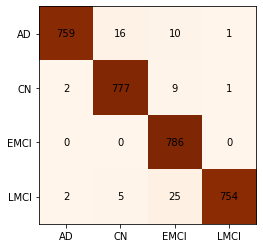



Accuracy: 97.74%

Micro Precision: 97.74%
Micro Recall: 97.74%
Micro F1-score: 97.74%


Macro Precision: 97.82%
Macro Recall: 97.74%
Macro F1-score: 97.75%


Weighted Precision: 97.82%
Weighted Recall: 97.74%
Weighted F1-score: 97.75%

Classification Report:

              precision    recall  f1-score   support

          AD       0.99      0.97      0.98       786
          CN       0.97      0.98      0.98       789
        EMCI       0.95      1.00      0.97       786
        LMCI       1.00      0.96      0.98       786

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147





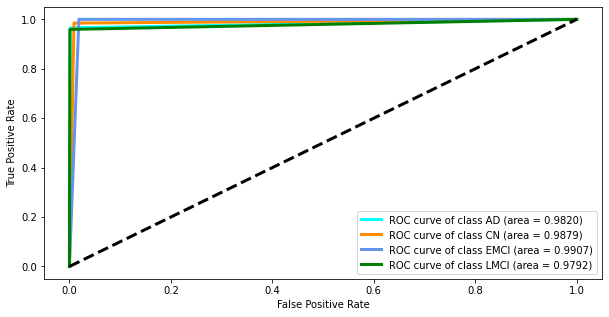

In [18]:
#Performance Evaluation of ResNet-152 model
performance_evaluation(resnet152_y_true, resnet152_y_pred)